In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For this example, we'll use the digits dataset from sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.images
y = digits.target

Shape of X: (1797, 8, 8)
Shape of y: (1797,)
Target label: 1


<Figure size 640x480 with 0 Axes>

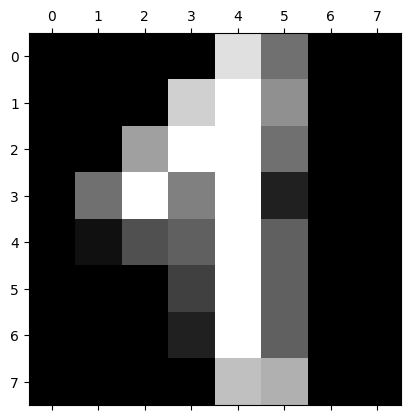

In [3]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

#Displaying and image from the dataset
plt.gray()
print(f"Target label: {digits.target[70]}")
plt.matshow(digits.images[70])
plt.show()

In [4]:
# Feature extraction from images
import cv2

def extract_features(image):
  features = []

  # Original pixel values
  features.extend(image.flatten())

  # Canny edges
  edges = cv2.Canny(image.astype(np.uint8), 100, 200)
  features.extend(edges.flatten())

  # Moments
  moments = cv2.moments(image)
  hu_moments = cv2.HuMoments(moments).flatten()
  features.extend(moments.values())

  return features

In [5]:
# Apply feature extraction to all images
X_features = np.array([extract_features(img) for img in X])

print(f"Shape of X_features: {X_features.shape}")

Shape of X_features: (1797, 152)


In [6]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
pcs = PCA(n_components=20)
X_train_pca = pcs.fit_transform(X_train)
X_test_pca = pcs.transform(X_test)

In [9]:
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [11]:
# Initialize and train classifiers
logistic_regression = LogisticRegression(max_iter=10000)  # Increased max_iter
evaluate_classifier(logistic_regression, X_train_pca, X_test_pca, y_train, y_test)

random_forest = RandomForestClassifier()
evaluate_classifier(random_forest, X_train_pca, X_test_pca, y_train, y_test)

svm = SVC()
evaluate_classifier(svm, X_train_pca, X_test_pca, y_train, y_test)

Accuracy: 0.9361111111111111
Confusion Matrix:
[[32  0  1  0  0  0  0  0  0  0]
 [ 0 25  2  0  0  0  0  0  0  1]
 [ 0  0 32  0  0  0  0  0  1  0]
 [ 0  0  1 30  0  1  0  0  2  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 42  1  0  0  3]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  1  0  2  0  1  0  0  1 35]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      0.89      0.91        28
           2       0.86      0.97      0.91        33
           3       0.94      0.88      0.91        34
           4       1.00      0.98      0.99        46
           5       0.91      0.89      0.90        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.88      0.97      0.92        30
           9       0.88      0.88      0.88        40

   